### Questions

### Objectives
YWBAT
* apply feature engineering to data to enhance models

### Outline

What is feature engineering?
- creating features from your data to model the data

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
boston = load_boston()
data = boston.data
target = boston.target
columns = list(boston.feature_names) + ['target']
data = np.column_stack([data, target])

In [3]:
pprint(boston.DESCR)

('.. _boston_dataset:\n'
 '\n'
 'Boston house prices dataset\n'
 '---------------------------\n'
 '\n'
 '**Data Set Characteristics:**  \n'
 '\n'
 '    :Number of Instances: 506 \n'
 '\n'
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value '
 '(attribute 14) is usually the target.\n'
 '\n'
 '    :Attribute Information (in order):\n'
 '        - CRIM     per capita crime rate by town\n'
 '        - ZN       proportion of residential land zoned for lots over 25,000 '
 'sq.ft.\n'
 '        - INDUS    proportion of non-retail business acres per town\n'
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; '
 '0 otherwise)\n'
 '        - NOX      nitric oxides concentration (parts per 10 million)\n'
 '        - RM       average number of rooms per dwelling\n'
 '        - AGE      proportion of owner-occupied units built prior to 1940\n'
 '        - DIS      weighted distances to five Boston employment centres\n'
 '        - RAD      index of 

In [4]:
df = pd.DataFrame(data, columns=columns)
df['target'] = 1000*df['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


### Dropping my high target values (outlier)

In [5]:
df = df[df['target'] < 40000]

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(20, 20))
plt.show()

(array([ 41.,  36., 107., 103.,  26.,  16.,  19.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 127.]),
 array([ 1.  ,  2.15,  3.3 ,  4.45,  5.6 ,  6.75,  7.9 ,  9.05, 10.2 ,
        11.35, 12.5 , 13.65, 14.8 , 15.95, 17.1 , 18.25, 19.4 , 20.55,
        21.7 , 22.85, 24.  ]),
 <a list of 20 Patch objects>)

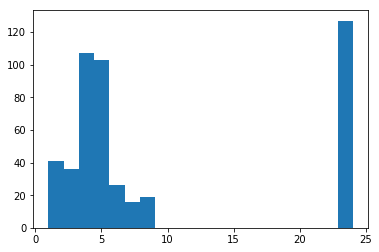

In [7]:
plt.hist(df["RAD"], bins=20)

In [8]:
df.RAD.value_counts()

24.0    127
4.0     107
5.0     103
3.0      36
6.0      26
2.0      22
8.0      19
1.0      19
7.0      16
Name: RAD, dtype: int64

In [9]:
rad_categories = []
for rad in df.RAD:
    if rad > 10:
        rad_categories.append(1)
    else:
        rad_categories.append(0)

In [10]:
df["rad_cat"] = rad_categories
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,rad_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0,0


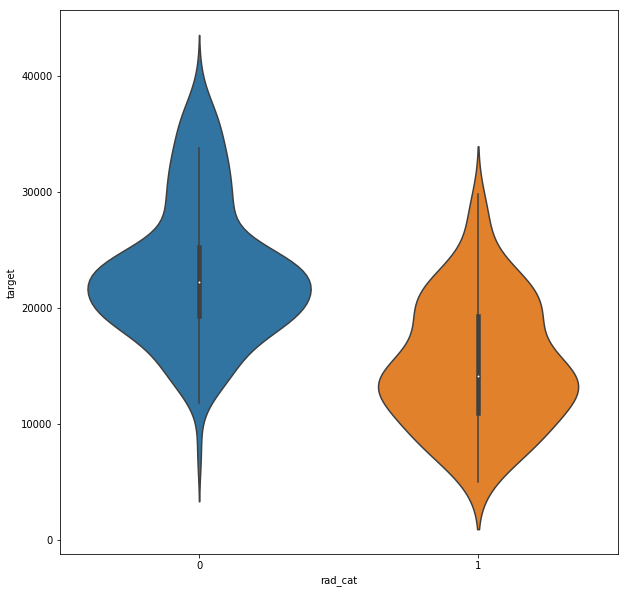

In [11]:
plt.figure(figsize=(10, 10))
sns.violinplot(x="rad_cat", y="target", data=df)
plt.show()

In [12]:
df.shape

(475, 15)

In [13]:
np.corrcoef(df.target, df.rad_cat)

array([[ 1.        , -0.51815814],
       [-0.51815814,  1.        ]])

(array([  7.,   6.,   7.,  22.,   5.,  21.,  22.,  17.,  18.,  13.,  18.,
         18.,  16.,  20.,  18.,  22.,  33.,  34.,  54., 104.]),
 array([  2.9  ,   7.755,  12.61 ,  17.465,  22.32 ,  27.175,  32.03 ,
         36.885,  41.74 ,  46.595,  51.45 ,  56.305,  61.16 ,  66.015,
         70.87 ,  75.725,  80.58 ,  85.435,  90.29 ,  95.145, 100.   ]),
 <a list of 20 Patch objects>)

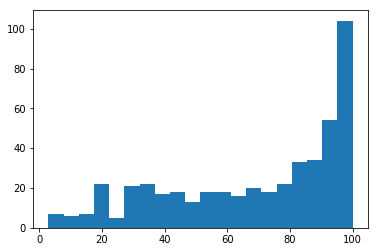

In [14]:
plt.hist(df.AGE, bins=20)

(array([347.,  38.,  24.,  21.,  15.,   7.,   7.,   3.,   4.,   1.,   0.,
          0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([6.32000000e-03, 2.97198267e+00, 5.93764533e+00, 8.90330800e+00,
        1.18689707e+01, 1.48346333e+01, 1.78002960e+01, 2.07659587e+01,
        2.37316213e+01, 2.66972840e+01, 2.96629467e+01, 3.26286093e+01,
        3.55942720e+01, 3.85599347e+01, 4.15255973e+01, 4.44912600e+01,
        4.74569227e+01, 5.04225853e+01, 5.33882480e+01, 5.63539107e+01,
        5.93195733e+01, 6.22852360e+01, 6.52508987e+01, 6.82165613e+01,
        7.11822240e+01, 7.41478867e+01, 7.71135493e+01, 8.00792120e+01,
        8.30448747e+01, 8.60105373e+01, 8.89762000e+01]),
 <a list of 30 Patch objects>)

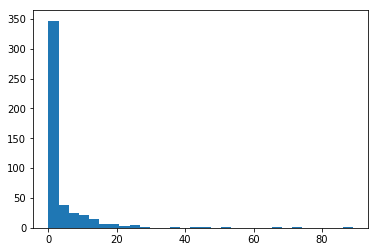

In [15]:
plt.hist(df.CRIM, bins=30)

In [16]:
df.CRIM.value_counts()

14.33370    2
0.08265     1
0.66351     1
0.02498     1
0.10000     1
0.05515     1
0.11027     1
0.01501     1
4.26131     1
0.34109     1
22.59710    1
0.28955     1
4.34879     1
0.10574     1
3.47428     1
5.66637     1
15.87440    1
0.04297     1
0.78570     1
0.29090     1
1.23247     1
2.44953     1
0.09512     1
0.05425     1
0.17783     1
88.97620    1
0.11747     1
0.03445     1
0.34940     1
0.12650     1
           ..
5.69175     1
3.16360     1
0.07022     1
0.02187     1
8.05579     1
10.06230    1
41.52920    1
0.32264     1
0.04379     1
0.22212     1
0.13117     1
0.51183     1
6.28807     1
0.08826     1
24.80170    1
0.09065     1
23.64820    1
3.56868     1
12.80230    1
0.72580     1
0.03113     1
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.26838     1
0.11460     1
0.03237     1
2.73397     1
0.84054     1
Name: CRIM, Length: 474, dtype: int64

In [17]:
df.CRIM.describe()

count    475.000000
mean       3.747852
std        8.838669
min        0.006320
25%        0.082545
50%        0.241030
75%        3.735965
max       88.976200
Name: CRIM, dtype: float64

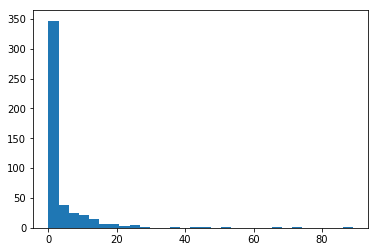

In [18]:
plt.hist(df.CRIM, bins=30)
plt.show()

In [19]:
df["high_crime"] = [1 if crime > 3.7 else 0 for crime in df.CRIM]

(array([356.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

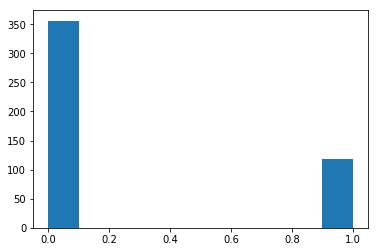

In [20]:
plt.hist(df.high_crime)

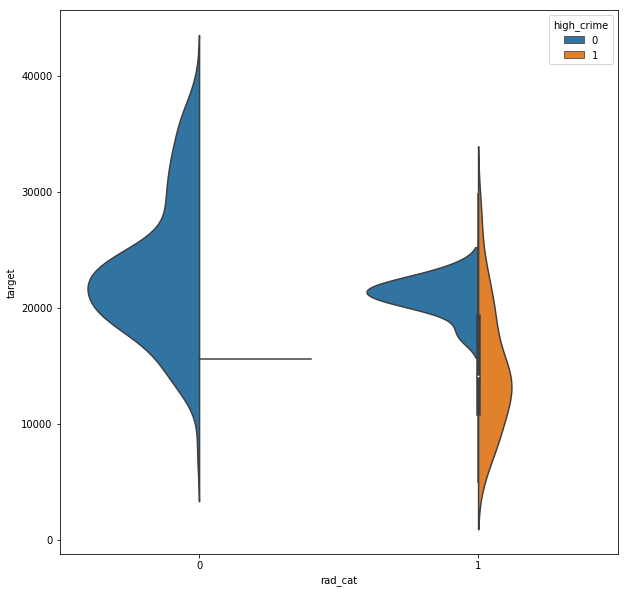

In [21]:
plt.figure(figsize=(10, 10))
sns.violinplot(x="rad_cat", y="target", data=df, hue='high_crime', split=True)
plt.show()

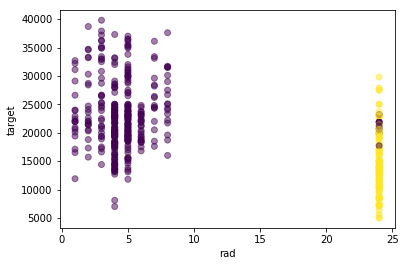

In [22]:
plt.scatter(x=df.RAD, y=df.target, c=df.high_crime, alpha=0.5)
plt.xlabel('rad')
plt.ylabel('target')
plt.show()

In [23]:
rad_crime = []
for crime, rad in zip(df.high_crime, df.rad_cat):
    if crime == 1 and rad == 1:
        rad_crime.append(1)
    else:
        rad_crime.append(0)
df['rad_crime'] = rad_crime
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,rad_cat,high_crime,rad_crime
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0,0,0,0


In [24]:
corr = df[['CRIM', 'RAD', 'target']].corr()
corr.head()

,CRIM,RAD,target
CRIM,1.000000,0.625818,-0.488403
RAD,0.625818,1.000000,-0.509836
target,-0.488403,-0.509836,1.000000


In [25]:
corr.shape

(3, 3)

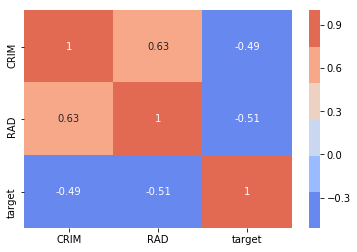

In [26]:
sns.heatmap(corr, fmt='0.2g', annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

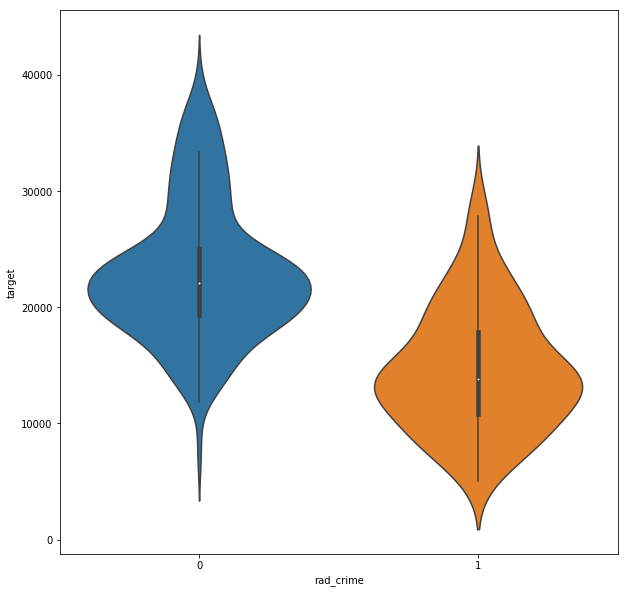

In [27]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='rad_crime', y='target', data=df)
plt.show()

In [28]:
np.corrcoef([df.CRIM + df.RAD], df.target)

array([[ 1.        , -0.55354958],
       [-0.55354958,  1.        ]])

In [30]:
# df.CRIM -> crime rate
# df.RAD -> radius from train lines (public transportation)

weights = np.linspace(0, 1, 10000)
max_corr = -1
best_weights = None
corrs = []

for index, weight in enumerate(weights):
    w1 = weight # get the first weight value
    w2 = 1 - weight # get the second weight value
    vals = w1*df.CRIM + w2*df.RAD # create a linear combination of the columns
    corr_coeff = np.abs(np.corrcoef(vals, df.target))[0][1] # get the corrcoeff with the target
    
    # if the corr_coeff is larger than the max, store the weights and change the max
    if corr_coeff > max_corr:
        best_weights = [w1, w2]
        max_corr = corr_coeff
        
    # store the correlation coefficients to a list
    corrs.append(corr_coeff)  
    
# output the desired weights
best_weights

[0.451945194519452, 0.5480548054805481]

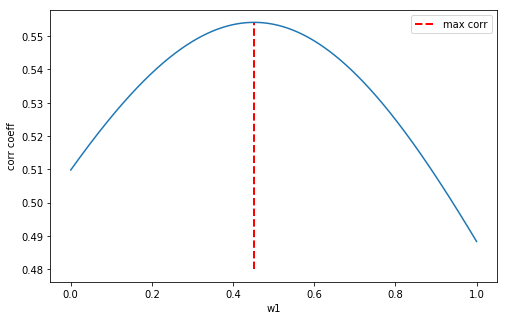

In [41]:
# plot the w1 vs coeff 
plt.figure(figsize=(8, 5))
plt.plot(weights, corrs)
plt.vlines(x=best_weights[0], ymin=0.48, ymax=max_corr, linestyle='--', colors='r', linewidth=2, label='max corr')
plt.legend()
plt.xlabel("w1")
plt.ylabel("corr coeff")
plt.show()

In [91]:
df['crime_rad_feature'] = desired_weights[0]*df.CRIM + desired_weights[1]*df.RAD

### Assessment

### Study group May 29

In [5]:
df = pd.DataFrame(data, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
def make_histogram(df, column, bins=20, title=None, alpha=.5, grid=True):
    plt.figure(figsize=(8, 5))
    if grid:
        plt.grid()
    plt.hist(df[column], bins=bins, alpha=alpha)
    if title:
        plt.title(title)
    plt.xlabel(column)
    plt.ylabel('counts')
    plt.show()
    pass


def sm_ols(df, cols, target='target', intercept=False):
    x = df[cols]
    y = df[target]
    if intercept:
        x = sm.add_constant(x)
    
    linreg = sm.OLS(y, x).fit()
    print(linreg.summary())
    return linreg


def make_lmplot(x=None, y=None, df=None):
    plt.figure(figsize=(8, 5))
    sns.lmplot(x=x, y=y, data=df)
    plt.show()
    pass


def get_z_scores(df, col):
    return (df[col] - df[col].mean()) / df[col].std()

### Let's assume cleaning is over, columns are normalized and standardized, etc

# Example Question:

## Q1: Does age effect the target at all? 

** Investigation + Visualiations**

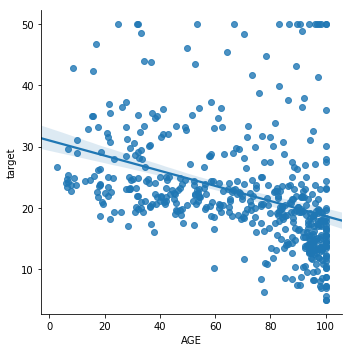

In [58]:
make_lmplot(x='AGE', y='target', df=df)

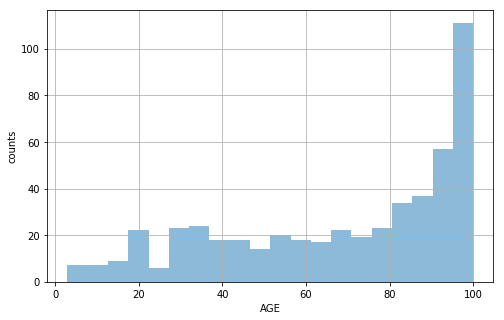

In [13]:
# Let's investigate the outlier for age
make_histogram(df, 'AGE')

*Histogram Insights*

Our data is heavily skewed to the right with very little data below the mid 20s. 

Perhaps we can try normalization and see how it effects the correlation.

In [14]:
df['log_age'] = np.log(df.AGE)

In [17]:
df.AGE.describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [18]:
agedf = df[df['AGE']>23] # remove age values below 23

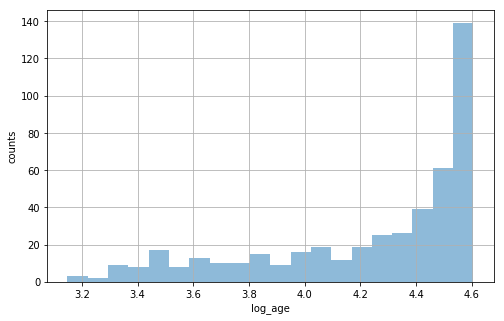

In [20]:
make_histogram(agedf, 'log_age')

In [22]:
x = df['AGE']
y = df['target']
linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     915.1
Date:                Wed, 29 May 2019   Prob (F-statistic):          1.85e-115
Time:                        14:26:01   Log-Likelihood:                -2071.5
No. Observations:                 506   AIC:                             4145.
Df Residuals:                     505   BIC:                             4149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.2636      0.009     30.250      0.000       0.246       0.281
==============================================================================
Omnibus:                       27.739   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.564
Skew:                           0.369   Prob(JB):                     5.65e-05
Kurtosis:                       2.380   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Insights from OLS*

Based on the OLS we see that the **AGE** has a 0.64 r2 score for describing the variance of our target.

We also see that it has a coefficient of 0.2636 which implies that it has a very minor positive correlation with our target. 

### Our model seems to be thrown off by our target outliers

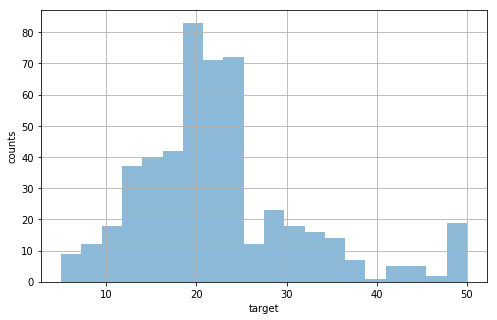

In [29]:
make_histogram(df, 'target')

In [31]:
# Let's remove all of the target values above 40
shortdf = df[df.target < 40]

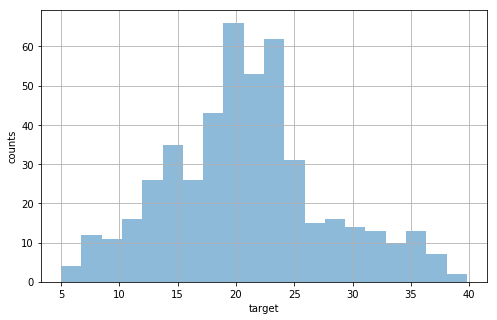

In [33]:
# our histogram now looks more normal than before
make_histogram(shortdf, 'target')

In [35]:
sm_ols(shortdf, cols=['AGE'])

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     960.6
Date:                Wed, 29 May 2019   Prob (F-statistic):          4.63e-116
Time:                        14:37:41   Log-Likelihood:                -1878.8
No. Observations:                 475   AIC:                             3760.
Df Residuals:                     474   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.2424      0.008     30.993      0.0

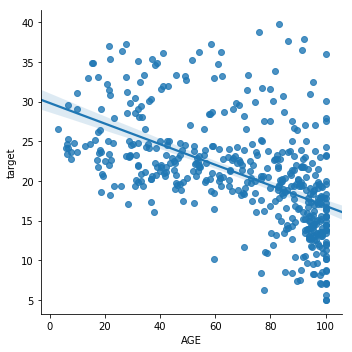

In [38]:
make_lmplot(x='AGE', y='target', df=shortdf)

Looking at the plot above we see that when AGE>80 and target>35 we have outliers.

Let's remove them and see how this effects the relationship

In [55]:
removedf = shortdf.loc[(shortdf.AGE > 80) & (shortdf.target > 35)]
removedf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,log_age
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8,4.422449
182,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,37.9,4.523960
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6,4.460144
258,0.66351,20.0,3.97,0.0,0.647,7.333,100.0,1.8946,5.0,264.0,13.0,383.29,7.79,36.0,4.605170
264,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5.0,264.0,13.0,387.89,8.10,36.5,4.517431


In [51]:
shorterdf = df.iloc[[index not in removedf.index for index in shortdf.index]]
shorterdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,log_age
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,4.177459
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,4.368181
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,4.112512
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3.824284
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3.992681


In [54]:
shorterdf.shape, shortdf.shape

((470, 15), (475, 15))

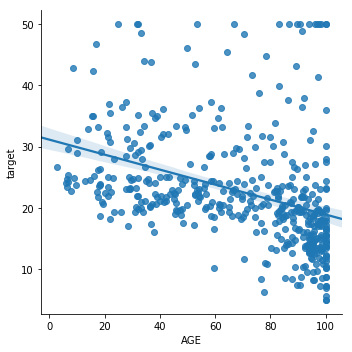

In [53]:
make_lmplot(x='AGE', y='target', df=shorterdf)

Let's investigate an ols model for this new dataframe

In [56]:
sm_ols(shorterdf, cols=['AGE'])

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     829.9
Date:                Wed, 29 May 2019   Prob (F-statistic):          8.28e-106
Time:                        14:50:36   Log-Likelihood:                -1933.4
No. Observations:                 470   AIC:                             3869.
Df Residuals:                     469   BIC:                             3873.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.2655      0.009     28.808      0.0

### Conclusion
*Findings*

Based on my findings, after removing outliers, it is evident that there is a positive correlation with the age and the target.  

*Recommendations*

Given this relationships, I would recommend that if a buyer wants a home with a smaller median value, then they should be looking in areas where home ownership, for homes greater than 40 years old, is a small percentage. 

In [57]:
sm_ols(shortdf, cols=['AGE', 'RAD', 'PTRATIO'])

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1434.
Date:                Wed, 29 May 2019   Prob (F-statistic):          1.18e-236
Time:                        14:53:54   Log-Likelihood:                -1592.3
No. Observations:                 475   AIC:                             3191.
Df Residuals:                     472   BIC:                             3203.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0607      0.013     -4.793      0.0

In [60]:
df['z_age'] = get_z_scores(df, 'AGE')

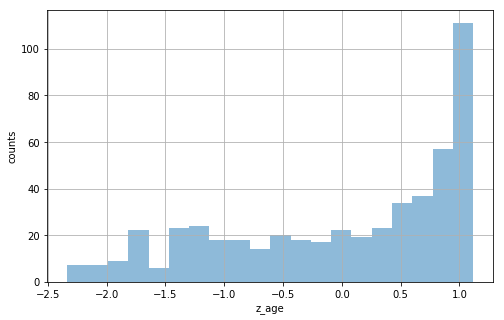

In [61]:
make_histogram(df, 'z_age')

In [63]:
sm_ols(df, cols=['AGE'])

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     915.1
Date:                Wed, 29 May 2019   Prob (F-statistic):          1.85e-115
Time:                        15:03:19   Log-Likelihood:                -2071.5
No. Observations:                 506   AIC:                             4145.
Df Residuals:                     505   BIC:                             4149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.2636      0.009     30.250      0.0

### What did we learn?
* removing outliers using pandas

In [64]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Great viz tool is a hexbins

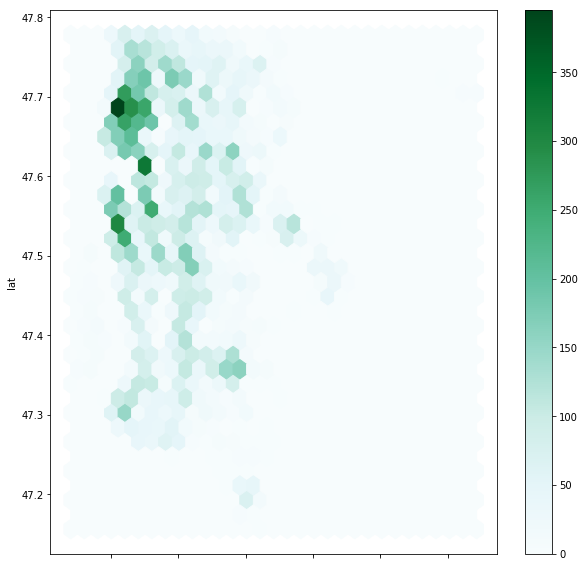

In [74]:
data.plot.hexbin(x='long', y='lat', gridsize=30, figsize=(10, 10))